In [2]:
from datetime import datetime, timedelta
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [3]:
#Change the 'date' column type to datetime format
blue_chips = pd.read_csv("blue_chips.csv", index_col=0)
blue_chips.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 2021-03-10 to nan
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   atom    258 non-null    float64
 1   avax    258 non-null    float64
 2   bat     258 non-null    float64
 3   bnb     258 non-null    float64
 4   btc     258 non-null    float64
 5   comp    258 non-null    float64
 6   cro     258 non-null    float64
 7   crv     258 non-null    float64
 8   eth     258 non-null    float64
 9   ftt     258 non-null    float64
 10  link    258 non-null    float64
 11  matic   258 non-null    float64
 12  sand    258 non-null    float64
 13  uni     258 non-null    float64
dtypes: float64(14)
memory usage: 34.8+ KB


In [4]:
blue_chips=blue_chips.dropna().copy()

In [5]:
blue_chips.index=pd.to_datetime(blue_chips.index, format='%Y-%m-%d')
blue_chips.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 258 entries, 2021-03-10 to 2021-11-22
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   atom    258 non-null    float64
 1   avax    258 non-null    float64
 2   bat     258 non-null    float64
 3   bnb     258 non-null    float64
 4   btc     258 non-null    float64
 5   comp    258 non-null    float64
 6   cro     258 non-null    float64
 7   crv     258 non-null    float64
 8   eth     258 non-null    float64
 9   ftt     258 non-null    float64
 10  link    258 non-null    float64
 11  matic   258 non-null    float64
 12  sand    258 non-null    float64
 13  uni     258 non-null    float64
dtypes: float64(14)
memory usage: 30.2 KB


In [6]:
blue_chips

,atom,avax,bat,bnb,btc,comp,cro,crv,eth,ftt,link,matic,sand,uni
Date,,,,,,,,,,,,,,
2021-03-10,21.122772,34.276748,0.743734,294.720234,54700.27344,502.378030,0.170762,2.408346,1869.331102,37.589154,31.579224,0.298713,0.527102,32.891086
2021-03-11,19.599752,29.807324,0.826824,278.401340,56020.48772,460.125073,0.172572,2.215544,1802.311092,36.506475,29.849770,0.288437,0.485970,30.935874
2021-03-12,19.129267,30.736809,0.803063,288.472839,57788.86810,465.679462,0.189549,2.166862,1826.057477,38.445728,30.094397,0.409046,0.528963,31.033956
2021-03-13,18.412846,28.117722,0.756011,264.080532,57353.86147,435.213832,0.190683,2.045609,1770.936179,37.142436,28.380764,0.412382,0.612020,31.040217
2021-03-14,19.385575,30.992577,0.812803,277.103746,61315.19793,463.895680,0.198572,2.358043,1927.720720,40.694938,29.831127,0.422974,0.692852,32.441689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-18,29.575445,108.501737,1.070015,580.013315,60603.65587,323.543230,0.527963,4.053855,4302.804959,51.747305,29.274434,1.641212,3.754189,21.969649
2021-11-19,26.475740,98.606463,0.973953,530.957013,56987.32234,293.595382,0.498630,4.084245,3993.846595,50.234244,26.464341,1.485475,4.392289,20.051586
2021-11-20,28.209935,111.369658,1.120981,584.292602,58459.25552,309.762530,0.569875,3.967794,4317.603196,52.708114,28.432360,1.623728,4.439577,21.304314


<Figure size 1500x1000 with 0 Axes>

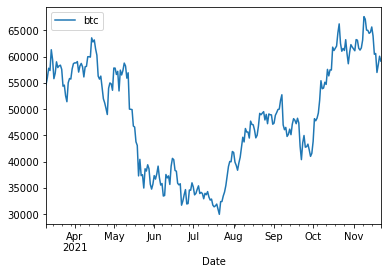

In [7]:
figure(figsize=(6,4), dpi=250)
blue_chips.plot(y="btc")
plt.show()

In [8]:
#Step 1: create Covariance and Correlation matrix for your portfolio
#first calculate percentage change as return, then calculate the log returns, then covariance
cov_matrix = blue_chips.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

,atom,avax,bat,bnb,btc,comp,cro,crv,eth,ftt,link,matic,sand,uni
atom,0.006636,0.004574,0.003747,0.003386,0.002001,0.003854,0.003042,0.004881,0.003044,0.003043,0.004216,0.004324,0.003596,0.003647
avax,0.004574,0.006842,0.003451,0.003264,0.001962,0.003326,0.003248,0.004475,0.002880,0.002898,0.003770,0.004235,0.003285,0.003458
bat,0.003747,0.003451,0.005769,0.003319,0.002015,0.003059,0.003025,0.004222,0.002804,0.002837,0.003798,0.003724,0.004229,0.003385
bnb,0.003386,0.003264,0.003319,0.003863,0.001777,0.002978,0.002440,0.003660,0.002674,0.002754,0.003442,0.003651,0.003282,0.003365
btc,0.002001,0.001962,0.002015,0.001777,0.001561,0.001852,0.001765,0.002290,0.001705,0.001728,0.002116,0.002123,0.002127,0.001927
comp,0.003854,0.003326,0.003059,0.002978,0.001852,0.005017,0.002539,0.004053,0.002946,0.002648,0.003656,0.003808,0.003125,0.003631
cro,0.003042,0.003248,0.003025,0.002440,0.001765,0.002539,0.004311,0.003359,0.002223,0.002325,0.003085,0.003196,0.003202,0.002673
crv,0.004881,0.004475,0.004222,0.003660,0.002290,0.004053,0.003359,0.007987,0.003387,0.003525,0.004623,0.004843,0.004410,0.004269
eth,0.003044,0.002880,0.002804,0.002674,0.001705,0.002946,0.002223,0.003387,0.002920,0.002628,0.003330,0.003458,0.002796,0.003159
ftt,0.003043,0.002898,0.002837,0.002754,0.001728,0.002648,0.002325,0.003525,0.002628,0.003455,0.003289,0.003336,0.002944,0.003059


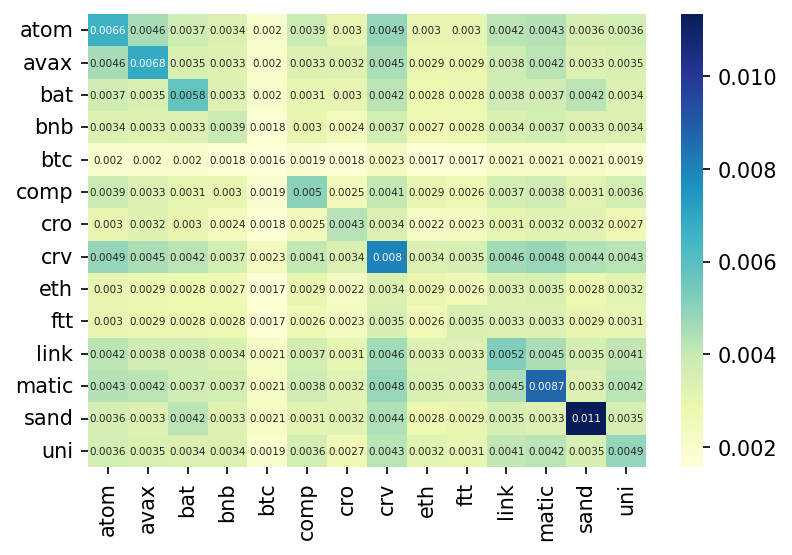

In [9]:
#Heatmap of covariance
figure(figsize=(6,4), dpi=150)
sns.heatmap(cov_matrix, annot=True,annot_kws={"size": 5}, cmap="YlGnBu")
plt.show()

In [10]:
#Step 2: calculate correlation
corr_matrix = blue_chips.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

,atom,avax,bat,bnb,btc,comp,cro,crv,eth,ftt,link,matic,sand,uni
atom,1.000000,0.678736,0.605620,0.668771,0.621754,0.667927,0.568693,0.670518,0.691603,0.635525,0.717333,0.567627,0.414493,0.641011
avax,0.678736,1.000000,0.549352,0.634972,0.600562,0.567732,0.597941,0.605301,0.644225,0.595955,0.631621,0.547549,0.372796,0.598529
bat,0.605620,0.549352,1.000000,0.702996,0.671457,0.568540,0.606584,0.622055,0.683230,0.635566,0.693124,0.524326,0.522786,0.638098
bnb,0.668771,0.634972,0.702996,1.000000,0.723941,0.676554,0.597818,0.658880,0.796216,0.753808,0.767490,0.628285,0.495833,0.775092
btc,0.621754,0.600562,0.671457,0.723941,1.000000,0.661856,0.680359,0.648591,0.798599,0.744179,0.742258,0.574717,0.505499,0.698491
comp,0.667927,0.567732,0.568540,0.676554,0.661856,1.000000,0.545941,0.640199,0.769657,0.635970,0.715377,0.574975,0.414185,0.733962
cro,0.568693,0.597941,0.606584,0.597818,0.680359,0.545941,1.000000,0.572500,0.626412,0.602367,0.651282,0.520609,0.457886,0.582829
crv,0.670518,0.605301,0.622055,0.658880,0.648591,0.640199,0.572500,1.000000,0.701281,0.670978,0.716927,0.579602,0.463272,0.683923
eth,0.691603,0.644225,0.683230,0.796216,0.798599,0.769657,0.626412,0.701281,1.000000,0.827421,0.854230,0.684458,0.485796,0.837058
ftt,0.635525,0.595955,0.635566,0.753808,0.744179,0.635970,0.602367,0.670978,0.827421,1.000000,0.775537,0.607006,0.470156,0.745237


<AxesSubplot:>

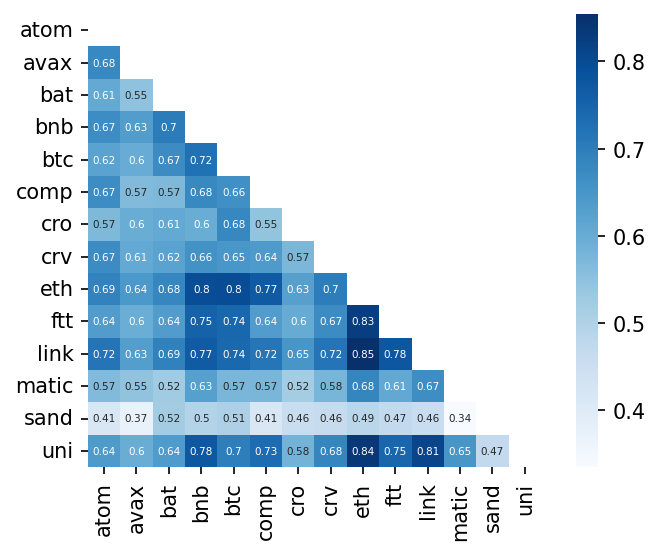

In [11]:
figure(figsize=(6,4), dpi=150)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask
sns.heatmap(corr_matrix, mask=mask, square=True,annot=True, annot_kws={"size": 5}, cmap="Blues")

In [12]:
print(blue_chips.columns)

Index(['atom', 'avax', 'bat', 'bnb', 'btc', 'comp', 'cro', 'crv', 'eth', 'ftt',
       'link', 'matic', 'sand', 'uni'],
      dtype='object')


In [13]:
# Create an equally weighted portfolio and calculate its variance (risk)
w = {'atom':0.07,
     'avax':0.07,
     'bat':0.07, 
     'bnb':0.07, 
     'btc':0.09, 
     'comp':0.07, 
     'cro':0.07, 
     'crv':0.07, 
     'eth':0.07, 
     'ftt':0.07,
     'link':0.07, 
     'matic':0.07, 
     'sand':0.07, 
     'uni':0.07}
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

0.00334589967236511

In [38]:
# Step 3: Calculate expected annual return for each token

#Annualized returns, for 'Y' in resample denote yearly return
#ind_er = blue_chips.resample('Y').last().pct_change().mean()
#ind_er

atom    NaN
avax    NaN
bat     NaN
bnb     NaN
btc     NaN
comp    NaN
cro     NaN
crv     NaN
eth     NaN
ftt     NaN
link    NaN
matic   NaN
sand    NaN
uni     NaN
dtype: float64

In [19]:
#return between the first date of the period to the last date
ind_er = (blue_chips.iloc[-1] - blue_chips.iloc[0])/blue_chips.iloc[0]
ind_er

atom     0.485456
avax     2.797607
bat      0.460889
bnb      1.002761
btc      0.081161
comp    -0.388016
cro      3.297541
crv      0.595613
eth      1.310646
ftt      0.385003
link    -0.073023
matic    4.415330
sand     6.742272
uni     -0.334431
dtype: float64

In [20]:
# Portfolio returns
w = [0.07, 0.07, 0.07, 0.07, 0.09, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07]
port_er = (w*ind_er).sum()
port_er

1.4561397496156923

In [21]:
#Step 4: plot effecient frontier
# Volatility is given by standard deviation.
ann_sd = blue_chips.pct_change().apply(lambda x: np.log(1+x)).std()
ann_sd

atom     0.081462
avax     0.082718
bat      0.075953
bnb      0.062152
btc      0.039505
comp     0.070834
cro      0.065659
crv      0.089368
eth      0.054037
ftt      0.058779
link     0.072150
matic    0.093502
sand     0.106514
uni      0.069845
dtype: float64

In [22]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets by combining 2 dataframes. axis = 1 means merge them vertically, axis = 0 mean stack them horizontally
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
atom,0.485456,0.081462
avax,2.797607,0.082718
bat,0.460889,0.075953
bnb,1.002761,0.062152
btc,0.081161,0.039505
comp,-0.388016,0.070834
cro,3.297541,0.065659
crv,0.595613,0.089368
eth,1.310646,0.054037
ftt,0.385003,0.058779


In [23]:
#To create efficient frontier, we need to generate random portfolio allocation. We will run the simulation 1000 times

p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(blue_chips.columns)
num_portfolios = 10000

In [24]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(365) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [25]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(blue_chips.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [26]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,atom weight,avax weight,bat weight,bnb weight,btc weight,comp weight,cro weight,crv weight,eth weight,ftt weight,link weight,matic weight,sand weight,uni weight
0,1.648689,1.167668,0.174294,0.014658,0.025976,0.113534,0.099483,0.067790,0.060646,0.167494,0.032837,0.006073,0.037407,0.058204,0.122014,0.019588
1,1.255736,1.137705,0.097405,0.101196,0.068603,0.028182,0.028578,0.099761,0.069391,0.080242,0.100802,0.070762,0.062171,0.057270,0.037152,0.098483
2,1.475227,1.127969,0.098790,0.065412,0.093289,0.074873,0.052346,0.034362,0.042956,0.092889,0.128166,0.086908,0.034276,0.101503,0.045602,0.048627
3,1.105141,1.103535,0.089425,0.141709,0.085955,0.121718,0.072211,0.132449,0.066099,0.003858,0.008139,0.084594,0.117523,0.007506,0.040146,0.028669
4,1.975098,1.146930,0.098039,0.053845,0.024193,0.134061,0.056782,0.084367,0.006866,0.049980,0.090098,0.055285,0.010399,0.117079,0.144798,0.074208


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

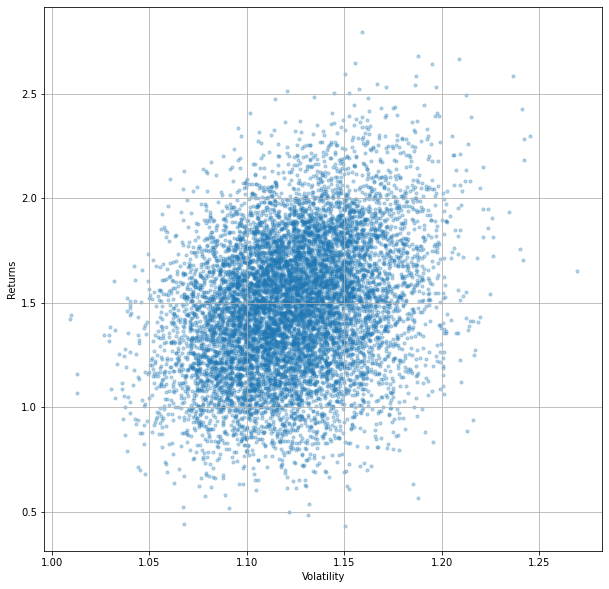

In [27]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])